Varias cosas para atender, hay que ver cómo sacar los signos '¿' que aparecen como una z con un puntito arriba y eso caga todo. Otra cosa es que las palabras más frecuentes probablemente sean las que aparecen en los títulos de las secciones. Probablemente lo mejor sea hacer un exploratorio con ellas y luego sacarlas para hacer otro exploratorio. Mirar las páginas de los diarios para verificar eso, de cualquier manera pensar en las palabras más frecuentes para la comparación, por ejemplo la palabra 'uruguay' aparece en todos los diarios como una de las más frecuentes, no tiene caso comparar considerando algo que todos tienen. Quizás sacarlas de la jugada y comparar. Otra cosa es pensar en mirar las stopwords del paquete y ver si hay que habilitar algunas palabras y/o incluir algunas a la lista, por ejemplo 'como, cómo'.

Los análisis hechos acá siguen los hechos en: Análisis de texto (text mining) con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py25-text-mining-python.html
Todavía no hice todos los análisis que en el trabajo están, igualmente ya hay varios aspectos metodólogicos que tengo que revisar para entender bien que es lo que se está haciendo.

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import string
import re

In [2]:
# Preprocesado y modelado
# ==============================================================================

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

In [3]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

In [4]:
tit_senti = pd.read_csv('C:/Users/farav/OneDrive/Documentos/Python Scripts/base_tit_senti_fecha.csv', encoding='iso8859_2')
tit_senti.head()

,titular,fecha,diario,sentimiento
0,"""Mirá la ceremonia de inauguración de los Jueg...",2021-07-23,elobse,NEU
1,"""El contrasentido del clásico: Peńarol perdió ...",2021-07-23,elobse,NEU
2,"""Los sueldos de $ 200.000 en el Directorio de ...",2021-07-23,elobse,NEU
3,"""żDónde se podrán ver los Juegos Olímpicos de ...",2021-07-23,elobse,NEU
4,"""Crece interés de argentinos por Montevideo: c...",2021-07-23,elobse,POS


In [5]:
tit_senti.groupby(by='diario')['titular'].count()


Número de titulos por diario



diario
elobse    17468
elpais    20019
ladiar    25790
montev    20028
republ    13626
Name: titular, dtype: int64

In [6]:
def limpiar_tokenizar(texto):
    nuevo_texto = texto.lower()
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    nuevo_texto = wordpunct_tokenize(nuevo_texto)
    nuevo_texto = [token for token in nuevo_texto if len(token) > 3]
    
    return(nuevo_texto)

In [7]:
tit_senti['tit_tokenizado'] = tit_senti['titular'].apply(lambda x: limpiar_tokenizar(x))
tit_senti

,titular,fecha,diario,sentimiento,tit_tokenizado
0,"""Mirá la ceremonia de inauguración de los Jueg...",2021-07-23,elobse,NEU,"[mirá, ceremonia, inauguración, juegos, olímpi..."
1,"""El contrasentido del clásico: Peńarol perdió ...",2021-07-23,elobse,NEU,"[contrasentido, clásico, peńarol, perdió, canc..."
2,"""Los sueldos de $ 200.000 en el Directorio de ...",2021-07-23,elobse,NEU,"[sueldos, directorio, caja, profesionales, pro..."
3,"""żDónde se podrán ver los Juegos Olímpicos de ...",2021-07-23,elobse,NEU,"[żdónde, podrán, juegos, olímpicos, tokio, uru..."
4,"""Crece interés de argentinos por Montevideo: c...",2021-07-23,elobse,POS,"[crece, interés, argentinos, montevideo, compr..."
...,...,...,...,...,...
96926,"""La Unión Económica Euroasiática en el context...",2022-07-19,republ,NEU,"[unión, económica, euroasiática, contexto, san..."
96927,"""La fuerza de las ideas batllistas en la educa...",2022-07-19,republ,NEU,"[fuerza, ideas, batllistas, educación]"
96928,"""Suplemento Ciencia & Tecnología  19 de Julio...",2022-07-19,republ,NEU,"[suplemento, ciencia, tecnología, julio]"
96929,"""Ghana declara un brote tras detectar dos muer...",2022-07-19,republ,NEU,"[ghana, declara, brote, tras, detectar, muerte..."


In [8]:
tit_senti_tidy = tit_senti.explode(column='tit_tokenizado')
tit_senti_tidy = tit_senti_tidy.drop(columns='titular')
tit_senti_tidy = tit_senti_tidy.rename(columns={'tit_tokenizado':'token'})
tit_senti_tidy.head(5)

,fecha,diario,sentimiento,token
0,2021-07-23,elobse,NEU,mirá
0,2021-07-23,elobse,NEU,ceremonia
0,2021-07-23,elobse,NEU,inauguración
0,2021-07-23,elobse,NEU,juegos
0,2021-07-23,elobse,NEU,olímpicos


In [9]:
print('\n''Palabras totales por diario')
print('--------------------------')
tit_senti_tidy.groupby(by='diario')['token'].count()


Palabras totales por diario
--------------------------


diario
elobse    123101
elpais    142273
ladiar    194209
montev    151910
republ     66238
Name: token, dtype: int64

In [10]:
print('----------------------------')
print('Palabras distintas por diario')
print('----------------------------')
tit_senti_tidy.groupby(by='diario')['token'].nunique()

----------------------------
Palabras distintas por diario
----------------------------


diario
elobse    17256
elpais    20485
ladiar    15891
montev    20379
republ    12008
Name: token, dtype: int64

In [11]:
# Top 20 palabras más utilizadas por cada diario
# ==============================================================================
tit_senti_tidy.groupby(['diario','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('diario') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(10))

diario       token  count
diario                                 
elobse 11727  elobse        para   2571
       16297  elobse     uruguay   1671
       11306  elobse  observador    581
       13141  elobse      página    573
       14982  elobse       sobre    572
       4311   elobse        cómo    550
       10820  elobse       mundo    547
       1662   elobse        ańos    495
       6287   elobse        este    460
       12203  elobse     peńarol    435
elpais 31234  elpais        para   2977
       36546  elpais     uruguay   1446
       37681  elpais        żqué    739
       35002  elpais       sobre    647
       36187  elpais        tras    612
       19236  elpais        ańos    559
       30300  elpais    nacional    518
       31803  elpais     peńarol    458
       24755  elpais        este    421
       37593  elpais       żcómo    420
ladiar 48627  ladiar        para   3686
       51679  ladiar       sobre   1506
       52839  ladiar     uruguay   1338
       38835  ladiar     apuntes   1173
       44848  ladiar    gigantes   1149
       43658  ladiar        este    807
       39340  ladiar        ańos    747
       41304  ladiar      contra    696
       44898  ladiar    gobierno    677
       40867  ladiar        como    658
montev 67509  montev        para   2517
       72901  montev     uruguay   1321
       67218  montev     opinión   1105
       71344  montev       sobre    777
       55565  montev        ańos    697
       72564  montev        tras    680
       61096  montev        este    615
       58447  montev       covid    591
       66949  montev       nuevo    503
       66559  montev    nacional    488
republ 81877  republ        para   1026
       85010  republ     uruguay    472
       81331  republ    nacional    325
       78976  republ      futuro    294
       79795  republ   industria    288
       75647  republ      camino    283
       84152  republ       sobre    283
       84513  republ      teatro    267
       75773  republ    carnaval    266
       75587  republ        cada    264

In [12]:
stop_words = list(stopwords.words('spanish'))
print(stop_words[:10])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


In [13]:
# Filtrado para excluir stopwords
# ==============================================================================
tit_senti_tidy = tit_senti_tidy[~(tit_senti_tidy['token'].isin(stop_words))]

tit_senti_tidy.groupby(['diario','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('diario') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(10))

diario       token  count
diario                                 
elobse 16170  elobse     uruguay   1671
       11232  elobse  observador    581
       13059  elobse      página    573
       4302   elobse        cómo    550
       10753  elobse       mundo    547
       1657   elobse        ańos    495
       12123  elobse     peńarol    435
       15891  elobse        tras    410
       10861  elobse    nacional    408
       15645  elobse      tiempo    369
elpais 36288  elpais     uruguay   1446
       37422  elpais        żqué    739
       35937  elpais        tras    612
       19103  elpais        ańos    559
       30103  elpais    nacional    518
       31593  elpais     peńarol    458
       37334  elpais       żcómo    420
       22318  elpais        cómo    399
       18544  elpais   argentina    397
       21959  elpais       covid    397
ladiar 52458  ladiar     uruguay   1338
       38571  ladiar     apuntes   1173
       44540  ladiar    gigantes   1149
       39076  ladiar        ańos    747
       44590  ladiar    gobierno    677
       52127  ladiar     trabajo    610
       48257  ladiar    pandemia    585
       52211  ladiar        tras    570
       47546  ladiar    nacional    557
       40512  ladiar     colonia    507
montev 72387  montev     uruguay   1321
       66758  montev     opinión   1105
       55178  montev        ańos    697
       72057  montev        tras    680
       58058  montev       covid    591
       66489  montev       nuevo    503
       66105  montev    nacional    488
       67592  montev     peńarol    422
       54593  montev   argentina    417
       59327  montev        dijo    411
republ 84385  republ     uruguay    472
       80758  republ    nacional    325
       78417  republ      futuro    294
       79224  republ   industria    288
       75127  republ      camino    283
       83908  republ      teatro    267
       75253  republ    carnaval    266
       75067  republ        cada    264
       84549  republ       verde    263
       83511  republ  sindicales    259

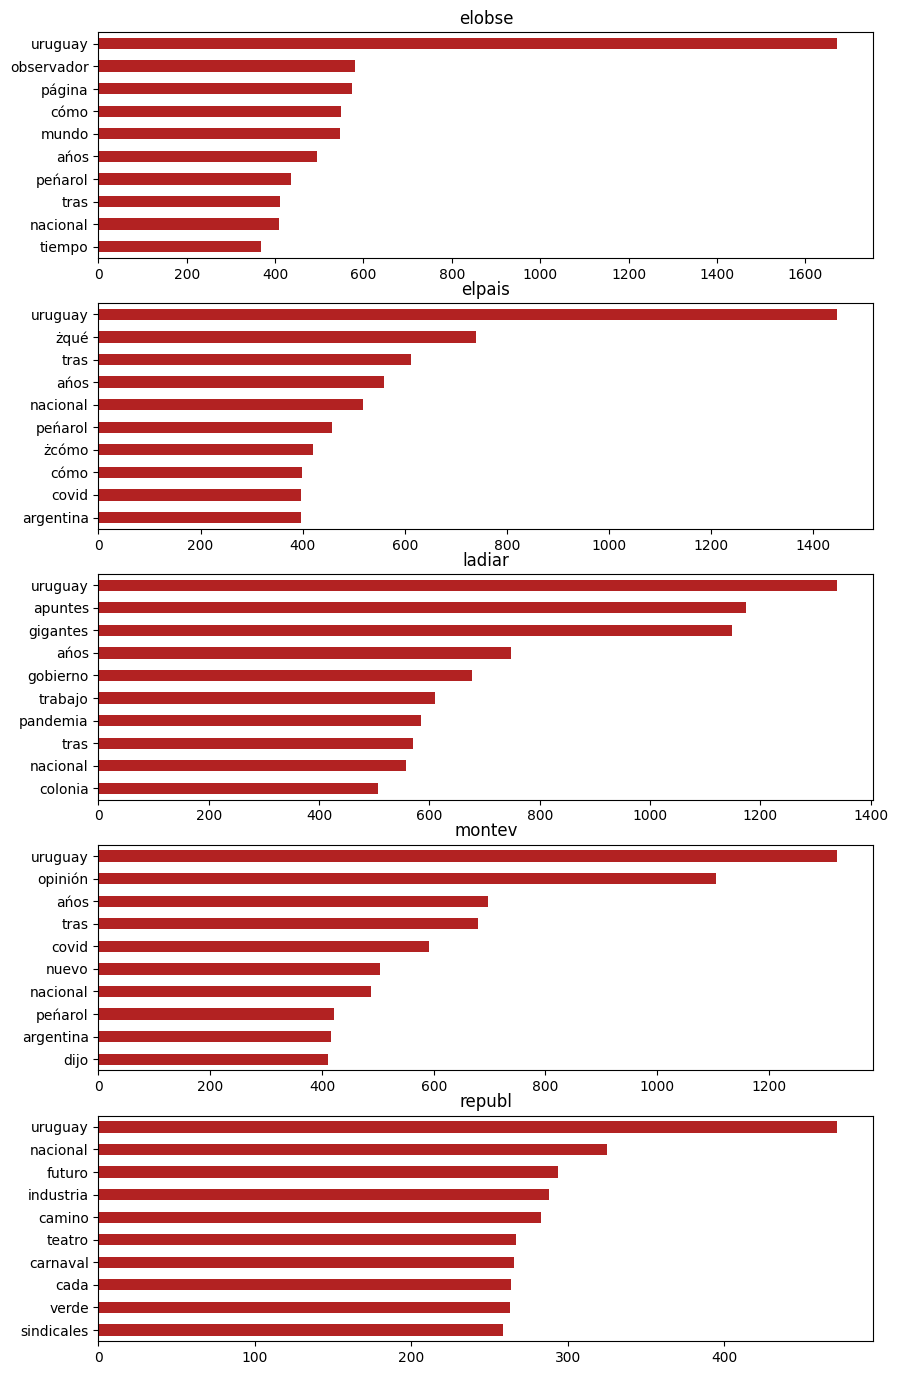

In [24]:
# Top 10 palabras por autor (sin stopwords)
# ==============================================================================
fig, axs = plt.subplots(nrows=5, ncols=1,figsize=(10, 17))
for i, diario in enumerate(tit_senti_tidy.diario.unique()):
    df_temp = tit_senti_tidy[tit_senti_tidy.diario == diario]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(diario)

In [14]:
# Pivotado de datos
# ==============================================================================
tit_senti_pivot = tit_senti_tidy.groupby(["diario","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="diario", values= "count")
tit_senti_pivot.columns.name = None

In [15]:
# Test de correlación (coseno) por el uso y frecuencia de palabras
# ==============================================================================
from scipy.spatial.distance import cosine

def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia

tit_senti_pivot.corr(method=similitud_coseno)

,elobse,elpais,ladiar,montev,republ
elobse,1.000000,0.862596,0.720387,0.798755,0.653630
elpais,0.862596,1.000000,0.712458,0.802823,0.642892
ladiar,0.720387,0.712458,1.000000,0.674472,0.689795
montev,0.798755,0.802823,0.674472,1.000000,0.628729
republ,0.653630,0.642892,0.689795,0.628729,1.000000


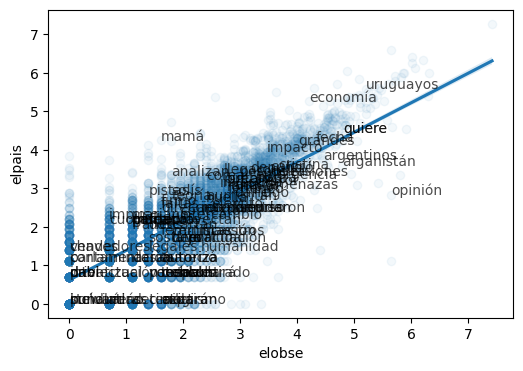

In [16]:
# Gráfico de correlación
# ==============================================================================
f, ax = plt.subplots(figsize=(6, 4))
temp = tit_senti_pivot.dropna()
sns.regplot(
    x  = np.log(temp.elobse),
    y  = np.log(temp.elpais),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        text  = temp.index[i],
        xy    = (np.log(temp.elobse[i]), np.log(temp.elpais[i])),
        alpha = 0.7
    )

In [17]:
# Número de palabras comunes
# ==============================================================================
palabras_elpais = set(tit_senti_tidy[tit_senti_tidy.diario == 'elpais']['token'])
palabras_elobse = set(tit_senti_tidy[tit_senti_tidy.diario == 'elobse']['token'])
palabras_ladiar = set(tit_senti_tidy[tit_senti_tidy.diario == 'ladiar']['token'])
palabras_montev = set(tit_senti_tidy[tit_senti_tidy.diario == 'montev']['token'])
palabras_republ = set(tit_senti_tidy[tit_senti_tidy.diario == 'republ']['token'])

print(f"Palabras comunes entre elpais y elobse: {len(palabras_elpais.intersection(palabras_elobse))}")
print(f"Palabras comunes entre elpais y montev: {len(palabras_elpais.intersection(palabras_montev))}")

Palabras comunes entre elpais y elobse: 10749
Palabras comunes entre elpais y montev: 11517


In [18]:
# Cálculo del log of odds ratio de cada palabra (elobse vs republ)
# ==============================================================================
# Pivotaje y despivotaje
tit_pivot = tit_senti_tidy.groupby(["diario","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="diario", values= "count")

tit_pivot = tit_pivot.fillna(value=0)
tit_pivot.columns.name = None

tit_unpivot = tit_pivot.melt(value_name='n', var_name='diario', ignore_index=False)
tit_unpivot = tit_unpivot.reset_index()

# Selección de los diarios elobse y republ
tit_unpivot = tit_unpivot[tit_unpivot.diario.isin(['elobse', 'republ'])]

# Se añade el total de palabras de cada diario
tit_unpivot = tit_unpivot.merge(
                    tit_senti_tidy.groupby('diario')['token'].count().rename('N'),
                    how = 'left',
                    on  = 'diario'
                 )

# Cálculo de odds y log of odds de cada palabra
tit_logOdds = tit_unpivot.copy()
tit_logOdds['odds'] = (tit_logOdds.n + 1) / (tit_logOdds.N + 1)
tit_logOdds = tit_logOdds[['token', 'diario', 'odds']] \
                    .pivot(index='token', columns='diario', values='odds')
tit_logOdds.columns.name = None

tit_logOdds['log_odds']     = np.log(tit_logOdds.elobse/tit_logOdds.republ)
tit_logOdds['abs_log_odds'] = np.abs(tit_logOdds.log_odds)

# Si el logaritmo de odds es mayor que cero, significa que es una palabra con
# mayor probabilidad de ser de elobse. Esto es así porque el ratio sea ha
# calculado como elobse/republ.
tit_logOdds['diario_frecuente'] = np.where(tit_logOdds.log_odds > 0,
                                              "elobse",
                                              "republ"
                                    )

In [19]:
tit_logOdds.sort_values('abs_log_odds', ascending=False).head(10)

,elobse,republ,log_odds,abs_log_odds,diario_frecuente
token,,,,,
amargueando,0.000009,0.004020,-6.130590,6.130590,republ
chicana,0.000009,0.004020,-6.130590,6.130590,republ
turf,0.000009,0.004020,-6.130590,6.130590,republ
guarani,0.000009,0.003795,-6.072961,6.072961,republ
improvisadas,0.000009,0.003023,-5.845571,5.845571,republ
observador,0.005089,0.000016,5.757341,5.757341,elobse
página,0.005019,0.000016,5.743500,5.743500,elobse
publicar,0.002492,0.000016,5.043360,5.043360,elobse
fúnebres,0.002475,0.000016,5.036318,5.036318,elobse
